In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read excel file

In [263]:
cols = list()
cols2 = list()

for i in range(1,4):
    data = pd.read_excel(f"mvda_adenovirus_bioprocess_data/AdV0{i}_LucullusBioprocessData.xlsx", sheet_name=None)
    cols.append(data['Capacitance'].columns)
    cols2.append(data['Lucullus Data'].columns)

In [259]:
[len(col) for col in cols]

[21, 22, 22]

In [264]:
[len(col) for col in cols2]

[64, 68, 71]

In [258]:
pd.DataFrame(cols).iloc[:,9:]

,9,10,11,12,13,14,15,16,17,18,19,20,21
0,High Frequency (KHz),Raw_Measure_Capacitance,Raw High Capacitance (pF/cm),Raw Pol Low Capacitance (pF/cm),Raw Pol High Capacitance (pF/cm),Raw_Conductivity,Filter Value,Zeroed Capacitance (pF/cm),Pol Correction Capacitance (pF/cm),Auto Clean,Hours Between Auto Cleans,Clean Recovery Time (Mins),None
1,High Frequency (KHz),Raw_Measure_Capacitance,Raw High Capacitance (pF/cm),Raw Pol Low Capacitance (pF/cm),Raw Pol High Capacitance (pF/cm),Raw_Conductivity,Filter Value,Zeroed Capacitance (pF/cm),Pol Correction Capacitance (pF/cm),Auto Clean,Hours Between Auto Cleans,Clean Recovery Time (Mins),
2,High Frequency (KHz),Raw_Measure_Capacitance,Raw High Capacitance (pF/cm),Raw Pol Low Capacitance (pF/cm),Raw Pol High Capacitance (pF/cm),Raw_Conductivity,Filter Value,Zeroed Capacitance (pF/cm),Pol Correction Capacitance (pF/cm),Auto Clean,Hours Between Auto Cleans,Clean Recovery Time (Mins),


In [3]:
# data = pd.read_excel("./mvda_adenovirus_bioprocess_data/AdV01_LucullusBioprocessData.xlsx", sheet_name=None)

data = pd.read_excel("mvda_adenovirus_bioprocess_data/AdV02_LucullusBioprocessData.xlsx", sheet_name=None)

In [10]:
    # df = df.dropna(axis=1, how='all')

data['Lucullus Data'].iloc[5:,:].dropna(axis=1, how='all')

,Time,Timestamp,m_do,m_ph,m_stirrer,m_temp,sp_do,sp_ph,sp_stirrer,sp_temp,...,M_GLUT,M_LAC,M_POT,M_SOD,M_TDENS,M_VDENS,M_VIAB,VT_TCID,M_VDENS_MICROSCOPE,M_VIAB_MICROSCOPE
5,0.000000,17-06-2022 14:09:33,79.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.001417,17-06-2022 14:09:38,79.800003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.002806,17-06-2022 14:09:43,79.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.004222,17-06-2022 14:09:48,79.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.005917,17-06-2022 14:09:54,79.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100908,140.386889,23-06-2022 10:32:46,54.299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100909,140.388000,23-06-2022 10:32:50,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100910,140.389417,23-06-2022 10:32:55,53.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100911,140.390806,23-06-2022 10:33:00,52.700001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### inspect file content

In [31]:
print(data.keys())
for d in data.items():
    print(d[0],d[1].shape)

dict_keys(['Lucullus Data', 'Capacitance', 'Explain'])
Lucullus Data (100913, 68)
Capacitance (8436, 22)
Explain (73, 5)


# Capacitance data

<Axes: >

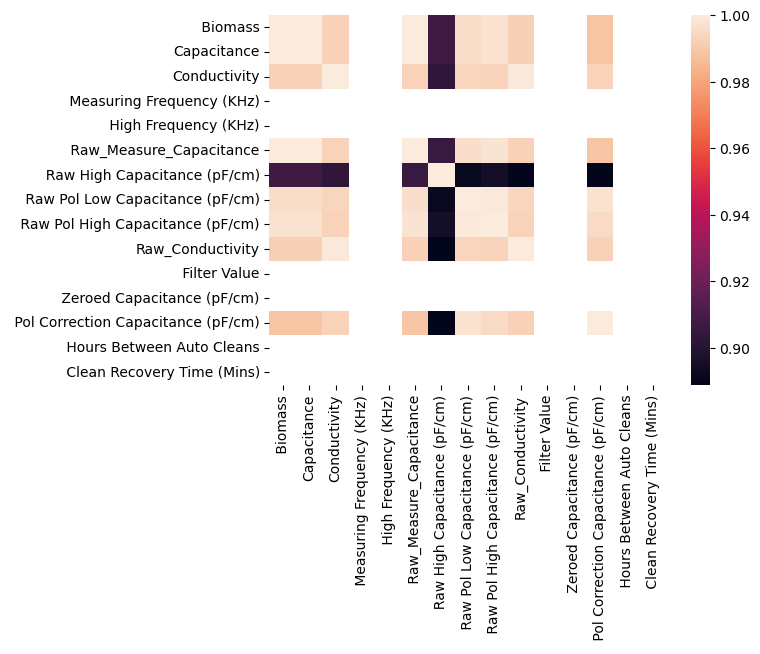

In [32]:
sns.heatmap(data['Capacitance'].select_dtypes('number').fillna(0).corr())

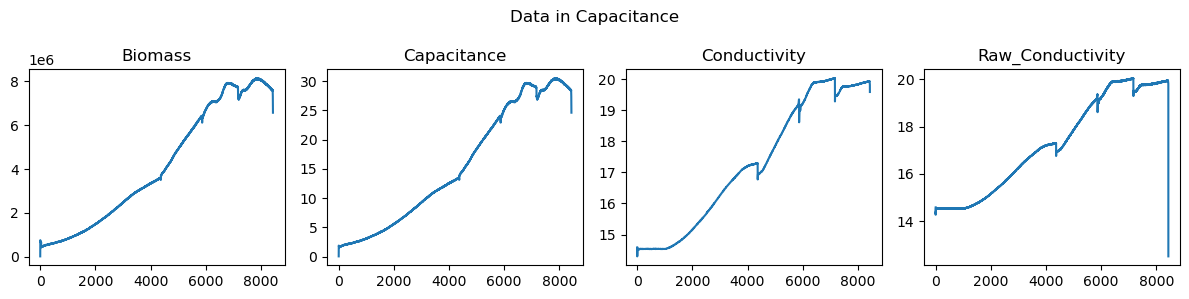

In [38]:
f, ax = plt.subplots(1,4,figsize=(12,3))

(data['Capacitance'].Biomass).plot(ax=ax[0],title='Biomass')
(data['Capacitance'].Capacitance).plot(ax=ax[1],title='Capacitance')
(data['Capacitance'].Conductivity).plot(ax=ax[2],title='Conductivity')
(data['Capacitance'].Raw_Conductivity).plot(ax=ax[3],title='Raw_Conductivity')

plt.suptitle("Data in Capacitance")
plt.tight_layout()
plt.show()

### How similar are capacitance and Biomass

In [ ]:
# Load modules and data
import numpy as np

import statsmodels.api as sm

endog = data['Capacitance'].Biomass
exog = data['Capacitance'].Capacitance
# Fit and summarize OLS model
mod = sm.OLS(endog, exog)
res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                Biomass   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.868e+13
Date:                Thu, 13 Nov 2025   Prob (F-statistic):                        0.00
Time:                        21:47:43   Log-Likelihood:                         -50569.
No. Observations:                8577   AIC:                                  1.011e+05
Df Residuals:                    8576   BIC:                                  1.011e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

* they are identical with coeff 301600
* otherwise, all the data are very correlated (pearson > 0.8) => Bad for ML, keep only 2 columns 

### ML task, predict biomass based on conductivity ?

### checking for duplicated or null data

In [ ]:
data['Capacitance'].duplicated().sum()

np.int64(0)

In [ ]:
data['Capacitance'].isnull().sum().sum()

np.int64(0)

### rate of aquisition in seconds

In [ ]:
data['Capacitance']['Time_Stamp'].diff().mean().total_seconds()

60.007229

### identify columns suitable as index

In [ ]:
pdf_cap = data['Capacitance']

cols = [(c,pdf_cap[c].nunique()) for c in pdf_cap.columns]
cols_to_keep_as_index = [c[0] for c in cols if c[1] == 1]
pdf_ok = pdf_cap.copy().loc[:,~pdf_cap.columns.isin(cols_to_keep_as_index)]
cols_to_keep_as_index

[' Zero Time Stamp',
 ' Messages',
 ' Dual Frequency',
 ' Polarisation Correction',
 ' Measuring Frequency (KHz)',
 ' High Frequency (KHz)',
 ' Filter Value',
 ' Zeroed Capacitance (pF/cm)',
 ' Auto Clean',
 ' Hours Between Auto Cleans',
 ' Clean Recovery Time (Mins)']

### correct column name to keep unit and remove special caractes for spark

In [16]:
keep_data =pdf_cap.columns.to_list()
for col in cols_to_keep_as_index:
    keep_data.remove(col)
print(keep_data)
# replace special caracter that caus eproblem with spark indexing
pd.Index(keep_data).str.replace(r'\s','',regex=True).str.replace(r'[ ,;{}/\(\)\n\t=]', '_', regex=True)

['Time_Stamp', 'Biomass', 'Capacitance', 'Conductivity', 'Raw_Measure_Capacitance', '  Raw High Capacitance (pF/cm)', ' Raw Pol Low Capacitance (pF/cm)', ' Raw Pol High Capacitance (pF/cm)', 'Raw_Conductivity', ' Pol Correction Capacitance (pF/cm)']


Index(['Time_Stamp', 'Biomass', 'Capacitance', 'Conductivity',
       'Raw_Measure_Capacitance', 'RawHighCapacitance_pF_cm_',
       'RawPolLowCapacitance_pF_cm_', 'RawPolHighCapacitance_pF_cm_',
       'Raw_Conductivity', 'PolCorrectionCapacitance_pF_cm_'],
      dtype='object')

# Lucillus data

In [100]:
new_columns = [f"{a}_{b}".strip().lower() if str(b).lower() != 'nan' else a for a, b in zip(data['Lucullus Data'].columns, data['Lucullus Data'].iloc[0,:])]

#### filter row base on line 1 if offlines

In [176]:
data['Lucullus Data']#.loc[:,data['Lucullus Data'].iloc[1,:]=="Offlines"]

,Time,Timestamp,m_do,m_ph,m_stirrer,m_temp,sp_do,sp_ph,sp_stirrer,sp_temp,...,M_GLUT,M_LAC,M_POT,M_SOD,M_TDENS,M_VDENS,M_VIAB,VT_TCID,M_VDENS_MICROSCOPE,M_VIAB_MICROSCOPE
0,NaN,NaN,%,NaN,rpm,°C,%,NaN,rpm,°C,...,mmol/L,g/L,mmol/L,mmol/L,10E6 cls/mL,10E6 cls/mL,%,10E6 cls/mL,10E6 cls/mL,%
1,NaN,NaN,01 SENSOR INPUT 1,01 SENSOR INPUT 1,01 SENSOR INPUT 1,01 SENSOR INPUT 1,02 SETPOINT LOOP 1,02 SETPOINT LOOP 1,02 SETPOINT LOOP 1,02 SETPOINT LOOP 1,...,Offlines,Offlines,Offlines,Offlines,Offlines,Offlines,Offlines,Offlines,Offlines,Offlines
2,NaN,NaN,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,...,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline,Offline
3,NaN,NaN,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,...,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4,Reactor 4
4,NaN,NaN,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,...,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16,BP Ad-F-CMV BioR 02 2022-Jun-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100908,140.386889,23-06-2022 10:32:46,54.299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100909,140.388000,23-06-2022 10:32:50,54.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100910,140.389417,23-06-2022 10:32:55,53.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100911,140.390806,23-06-2022 10:33:00,52.700001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# prepare data for spark
df_data = data['Lucullus Data'].copy().iloc[5:,:]#.fillna(0)
df_data.columns = new_columns
df_data.columns = df_data.columns.str.replace(r'\s','',regex=True).str.replace(r'[ ,;{}/\(\)\n\t=]', '_', regex=True).str.replace("%","percent")

df_data.dtypes

Time                             float64
Timestamp                         object
m_do_percent                      object
m_ph                              object
m_stirrer_rpm                     object
                                  ...   
m_vdens_10e6cls_ml                object
m_viab_percent                    object
vt_tcid_10e6cls_ml                object
m_vdens_microscope_10e6cls_ml     object
m_viab_microscope_percent         object
Length: 68, dtype: object

In [204]:
# index new columns names for Offline label
offline = df_data.columns[data['Lucullus Data'].iloc[1,:] == "Offlines"] 

print("n null", "name","\t\tn values")
print(20*"- ")
for c in offline:
    name = df_data.loc[:,c].name
    value = df_data.loc[:,c].nunique()
    null = df_data.loc[:,c].isna().sum()
    print(null, name,value)

n null name 		n values
- - - - - - - - - - - - - - - - - - - - 
100894 m_amm_mmol_l 12
100895 m_cal_mmol_l 3
100894 m_gluc_g_l 12
100894 m_glun_mmol_l 14
100894 m_glut_mmol_l 14
100894 m_lac_g_l 14
100895 m_pot_mmol_l 13
100895 m_sod_mmol_l 13
100894 m_tdens_10e6cls_ml 14
100894 m_vdens_10e6cls_ml 14
100894 m_viab_percent 14
100900 vt_tcid_10e6cls_ml 8
100894 m_vdens_microscope_10e6cls_ml 14
100894 m_viab_microscope_percent 14


### isolate unique values for data

In [169]:
df_data.shape

(100908, 68)

#### pick a look on available metadata

In [205]:
metadata=dict()
for c in df_data.columns:
    if df_data.loc[:,c].nunique() == 1:
        name = df_data.loc[:,c].name
        value = df_data.loc[:,c].unique()[1]
        metadata[name] = value
        print(name,value)


sp_do_percent 40
sp_ph 7.150000095367432
sp_temp_°c 37
cs_do 1
cs_stirrer 1
cs_temp 1
sp_air_ml_min 8.75
pid_do_ct 5
pid_do_d 0
pid_do_i 1500
pid_do_judge 0
pid_do_p 7
pid_ph_ct 5
pid_ph_d 0
pid_ph_dz 0.05000000074505806
pid_ph_i 0
pid_ph_judge 0
pid_ph_p 50
pid_temp_ct 5
pid_temp_d 0
pid_temp_i 3000
pid_temp_judge 0
pid_temp_p 100
A_FEED 1
A_INN 1
A_SAMPLE 1
A_Inf 1
f_glun_con_mmol_l 200


shape before  (100908, 68)
shape after  (100908, 26)


In [212]:
filter_out = list(offline) + list(metadata.keys())
print("shape before ",df_data.shape)
df_filtered = df_data.loc[:,~df_data.columns.isin(filter_out)]
print("shape after ",df_filtered.shape)

for col in df_filtered.columns:
    try:
        df_filtered[col] = df_filtered.loc[:,col].astype(float)
    except Exception as e :
        print(col,"can't be numeric",e)

shape before  (100908, 68)
shape after  (100908, 26)
Timestamp can't be numeric could not convert string to float: '17-06-2022 14:09:33'


/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_9419/730721446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered.loc[:,col].astype(float)
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_9419/730721446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered.loc[:,col].astype(float)
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_9419/730721446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

<Axes: >

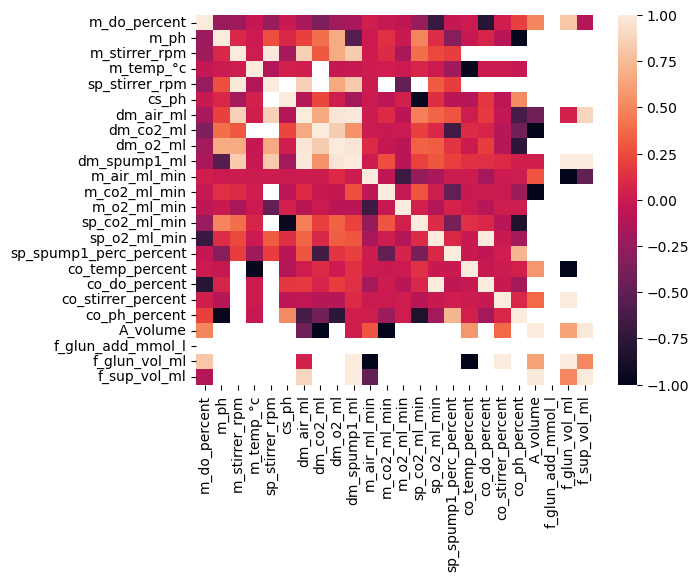

In [218]:
sns.heatmap(df_filtered.iloc[:,2:].corr())

#### filtrate columns too much correlated

In [ ]:
corr_df = df_filtered.iloc[:,2:].corr()
threshold = 0.6
cols_to_drop = set()
cols = corr_df.columns
    
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        if pd.isna(corr_df.loc[col1, col2]):
            continue
        if abs(corr_df.loc[col1, col2]) > threshold:
                # keep the column with max numb of values
                if df_filtered[col1].isna().sum() < df_filtered[col2].isna().sum():  
                    # drop if not already present
                    if col1 not in cols_to_drop:
                        cols_to_drop.add(col2)
                else:
                     cols_to_drop.add(col2)

print(sorted(list(cols_to_drop)))
final_df = df_filtered.loc[:,~df_filtered.columns.isin(cols_to_drop)]
print("final shape", final_df.shape)

['A_volume', 'co_do_percent', 'co_ph_percent', 'co_temp_percent', 'dm_air_ml', 'dm_o2_ml', 'dm_spump1_ml', 'f_glun_vol_ml', 'm_o2_ml_min', 'sp_co2_ml_min', 'sp_o2_ml_min', 'sp_spump1_perc_percent', 'sp_stirrer_rpm']
final shape (100908, 13)


#### all columns to remove for gold medaillon table:

In [227]:
drop = sorted(list(cols_to_drop)+list(offline)+list(metadata.keys()))
print(len(drop), list(map(lambda s: s.lower(), drop)))

55 ['a_feed', 'a_inn', 'a_inf', 'a_sample', 'a_volume', 'co_do_percent', 'co_ph_percent', 'co_temp_percent', 'cs_do', 'cs_stirrer', 'cs_temp', 'dm_air_ml', 'dm_o2_ml', 'dm_spump1_ml', 'f_glun_con_mmol_l', 'f_glun_vol_ml', 'm_amm_mmol_l', 'm_cal_mmol_l', 'm_gluc_g_l', 'm_glun_mmol_l', 'm_glut_mmol_l', 'm_lac_g_l', 'm_o2_ml_min', 'm_pot_mmol_l', 'm_sod_mmol_l', 'm_tdens_10e6cls_ml', 'm_vdens_10e6cls_ml', 'm_vdens_microscope_10e6cls_ml', 'm_viab_microscope_percent', 'm_viab_percent', 'pid_do_ct', 'pid_do_d', 'pid_do_i', 'pid_do_judge', 'pid_do_p', 'pid_ph_ct', 'pid_ph_d', 'pid_ph_dz', 'pid_ph_i', 'pid_ph_judge', 'pid_ph_p', 'pid_temp_ct', 'pid_temp_d', 'pid_temp_i', 'pid_temp_judge', 'pid_temp_p', 'sp_air_ml_min', 'sp_co2_ml_min', 'sp_do_percent', 'sp_o2_ml_min', 'sp_ph', 'sp_spump1_perc_percent', 'sp_stirrer_rpm', 'sp_temp_°c', 'vt_tcid_10e6cls_ml']


#### format datetime

In [ ]:
final_df.loc[:,"Timestamp"] = pd.to_datetime(final_df.copy().Timestamp)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_9419/1277489214.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data.loc[:,"Timestamp"] = pd.to_datetime(df_data.copy().Timestamp)


### have a look

<BarContainer object of 13 artists>

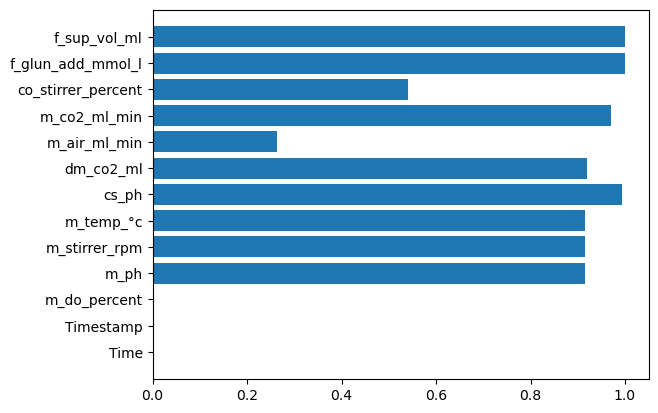

In [232]:
plt.barh(width = final_df.isnull().sum()/final_df.shape[0], y=final_df.columns)

#### choose variable to keep (c.a. empty < 50%)

In [253]:
sorted(zip( final_df.isnull().sum()/final_df.shape[0], final_df.columns))

[(0.0, 'Time'),
 (0.0, 'Timestamp'),
 (0.0, 'm_do_percent'),
 (0.26272446188607446, 'm_air_ml_min'),
 (0.5399869187775003, 'co_stirrer_percent'),
 (0.9157846751496412, 'm_ph'),
 (0.9157846751496412, 'm_stirrer_rpm'),
 (0.9157846751496412, 'm_temp_°c'),
 (0.9203234629563563, 'dm_co2_ml'),
 (0.971260950568835, 'm_co2_ml_min'),
 (0.9941927300114957, 'cs_ph'),
 (0.9999702699488643, 'f_sup_vol_ml'),
 (1.0, 'f_glun_add_mmol_l')]

In [247]:
empty_cols = final_df.columns[(final_df.isnull().sum() >= final_df.shape[0]*0.99)]
final_df[empty_cols]#.plot(kind="box")


,cs_ph,f_glun_add_mmol_l,f_sup_vol_ml
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
...,...,...,...
100908,NaN,NaN,NaN
100909,NaN,NaN,NaN
100910,NaN,NaN,NaN
100911,NaN,NaN,NaN


In [96]:
df_data.to_csv("copy.csv")

In [94]:
df_data.Timestamp = pd.to_datetime(df_data.Timestamp)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_13495/787957364.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data.Timestamp = pd.to_datetime(df_data.Timestamp)
/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_13495/787957364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.Timestamp = pd.to_datetime(df_data.Timestamp)


In [ ]:
describe_data = data['Capacitance'].describe(include='object')
describe_data.columns

Index(['Zero Time Stamp', 'Messages', 'Dual Frequency',
       'Polarisation Correction', 'Auto Clean'],
      dtype='object')

### Merge datasets

In [52]:
m1 = df_data.loc[:, df_data.columns.isin(df_data.columns[(df_data.isnull().sum() <= df_data.shape[0]*0.8)])]
m1.loc[:,"Timestamp"] = pd.to_datetime(m1.copy().Timestamp)
m2 = data['Capacitance'][['Time_Stamp','Capacitance','Conductivity']]
m2.loc[:,"Time_Stamp"] = pd.to_datetime(m2.copy().Time_Stamp)

merged = pd.merge(m1,m2,left_on="Timestamp",right_on="Time_Stamp",how='outer')
merged.shape

(108968, 10)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_6227/1649811211.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean().dropna()


(-2.5, 5.0)

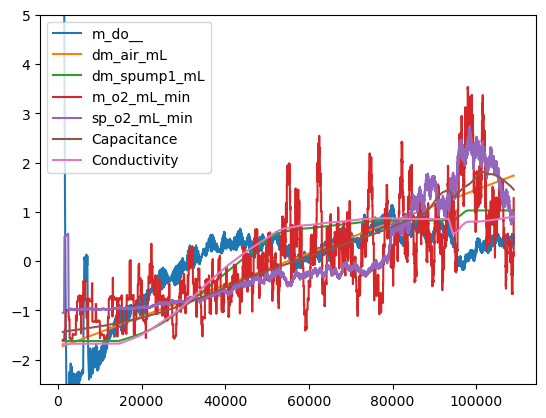

In [69]:
d = merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean().dropna()
((d - d.mean() )/ d.std()).plot()
plt.ylim(-2.5,5)

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_6227/4212426950.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean().isna())


<Axes: >

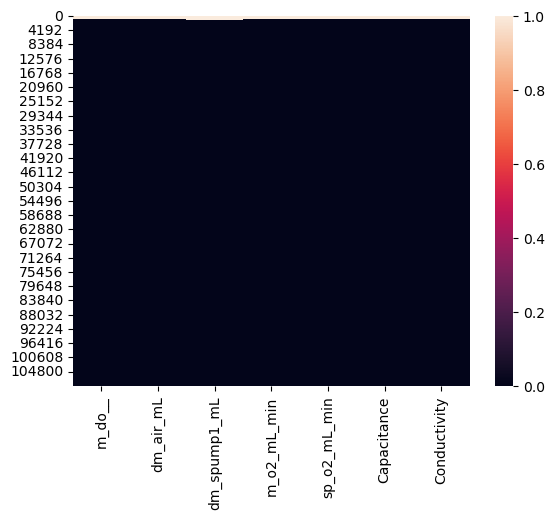

In [ ]:
import seaborn as sns
sns.heatmap(merged.drop(columns=['Time','Timestamp','Time_Stamp']).ffill().rolling(window=1000).mean())

## Ingest dat

In [51]:
with open("mvda_adenovirus_bioprocess_data/AdV01_MWF/spectra/AdV01_00000.dat","r") as f:
    data = f.read()

for l in data.split("\n"):
    print(l)

Process_Name: Br02-AD-F hycell
Date: 14/05/2022
Time: 10:35:53
Process_Time(days): 0.0002116
Light_Status(1=on): 1 1 
Light_Name: uv 365 uv 400
Light_Control_Type(0=Phidget,1=COMport,2=LPT1,3=LabJack,4=LabJack(reversed),5=Phidget(reversed)): 0 0
Voltage(V): 5.5 5.5
Integration_Time(ms): 300.0 300.0
Scans_To_Average: 10 10
Boxcar_Width(px): 20
Acquisition_Interval(min): 5.0
--------------------------------------------------
180.96483 1.6383749999995416 13.926187499999742
181.18397226108897 1.6383749999995416 13.926187499999742
181.40310466223272 1.6383749999995416 13.926187499999742
181.62222720024678 5.324718750000102 -11.468624999999975
181.84133987194656 -34.201078125000095 -3.4815468749998217
182.06044267414745 -27.033187500000622 36.45384375000003
182.27953560366498 14.13098437499957 -16.79334374999962
182.49861865731452 -72.90768750000007 -49.560843749999094
182.71769183191154 -18.226921875000244 -24.57562499999949
182.93675512427143 -0.8191875000006803 11.46862499999952
183.15580

<Axes: xlabel='Col1'>

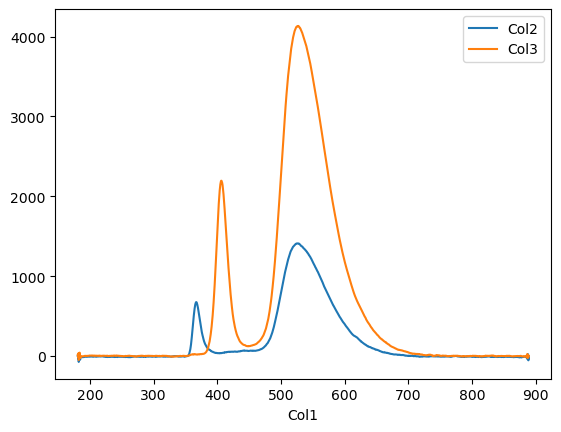

In [55]:
meta_text, data_text = data.split('--------------------------------------------------')

from io import StringIO
df_data = pd.read_csv(StringIO(data_text.strip()), sep=r'\s+', header=None)

# Assign generic column names
df_data.columns = ['Col1', 'Col2', 'Col3']
df_data.plot(x='Col1',y=['Col2','Col3'])

# compare datasets